In [85]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np



from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import sys
from time import time

import numpy as np

In [86]:
file = r'lyrics.csv'
df = pd.read_csv(file)
df['lyrics'].replace('', np.nan, inplace=True)
df.dropna(subset=['lyrics'], inplace=True)
ind_drop = df[df['genre'].apply(lambda x: x.startswith('Other'))].index
df = df.drop(ind_drop)


C:\Users\Blackfish96\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
ind_drop = df[df['genre'].apply(lambda x: x.startswith('Not Available'))].index
df = df.drop(ind_drop)



In [88]:
ind_drop = df[df['lyrics'].apply(lambda x: x.startswith('INSTRUMENTAL'))].index
df = df.drop(ind_drop)
df.drop(columns=['index'])

ind_drop = df[df['lyrics'].apply(lambda x: x.startswith('instrumental'))].index
df = df.drop(ind_drop)
df.drop(columns=['index'])

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...
7,waiting,2009,beyonce-knowles,Pop,"Waiting, waiting, waiting, waiting\nWaiting, w..."
8,slow-love,2009,beyonce-knowles,Pop,[Verse 1:]\nI read all of the magazines\nwhile...
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,"N-n-now, honey\nYou better sit down and look a..."


In [89]:
genre=df['genre'].values
lyrics=df['lyrics'].values
true_k = len(np.unique(genre))
print(true_k)
lyrics = np.array(lyrics)[:,None]
lyrics.shape

genre = np.array(genre)[:,None]
genre.shape

10


(236485, 1)

In [90]:
data=np.append(lyrics,genre,axis=1)
data.shape
print(data)
type(data)


[["Oh baby, how you doing?\nYou know I'm gonna cut right to the chase\nSome women were made but me, myself\nI like to think that I was created for a special purpose\nYou know, what's more special than you? You feel me\nIt's on baby, let's get lost\nYou don't need to call into work 'cause you're the boss\nFor real, want you to show me how you feel\nI consider myself lucky, that's a big deal\nWhy? Well, you got the key to my heart\nBut you ain't gonna need it, I'd rather you open up my body\nAnd show me secrets, you didn't know was inside\nNo need for me to lie\nIt's too big, it's too wide\nIt's too strong, it won't fit\nIt's too much, it's too tough\nHe talk like this 'cause he can back it up\nHe got a big ego, such a huge ego\nI love his big ego, it's too much\nHe walk like this 'cause he can back it up\nUsually I'm humble, right now I don't choose\nYou can leave with me or you could have the blues\nSome call it arrogant, I call it confident\nYou decide when you find on what I'm workin

numpy.ndarray

In [91]:
np.random.shuffle(data)
data=data[:10000,]
data.shape

(10000, 2)

In [92]:

data_lyrics=data[:,0]
data_genre=data[:,1]
print(data_lyrics.shape)
data_lyrics
print(data_genre)


(10000,)
['Pop' 'Rock' 'Hip-Hop' ... 'Rock' 'Rock' 'Rock']


In [93]:
vectorizer = TfidfVectorizer( 
                max_df=0.5, # max doc freq (as a fraction) of any word to include in the vocabulary
                min_df=2,   # min doc freq (as doc counts) of any word to include in the vocabulary
                max_features=10000,           # max number of words in the vocabulary
                stop_words='english',         # remove English stopwords
                use_idf=True ) 

In [94]:
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
X = vectorizer.fit_transform(data_lyrics)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
done in 1.296546s
n_samples: 10000, n_features: 10000


In [95]:
doc_ind = 1  # Index of an example document
xi = X[doc_ind,:].todense()
term_ind = xi.argsort()[:, ::-1]
xi_sort = xi[0,term_ind]
terms = vectorizer.get_feature_names()

for i in range(30):
    term = terms[term_ind[0,i]]
    tfidf = xi[0,term_ind[0,i]]
    print('{0:20s} {1:f} '.format(term, tfidf))

god                  0.501372 
army                 0.416156 
kill                 0.230225 
women                0.223519 
health               0.223120 
opinion              0.159113 
playing              0.156610 
soldiers             0.134058 
makes                0.130089 
twisted              0.124130 
choice               0.122501 
care                 0.122439 
really               0.107586 
donald               0.093478 
rev                  0.089821 
lies                 0.088293 
threatened           0.085945 
hateful              0.084909 
religious            0.084909 
interested           0.083963 
raped                0.082288 
impressed            0.081538 
ideals               0.081538 
beliefs              0.080837 
anti                 0.079557 
christian            0.078412 
ignorant             0.075986 
justify              0.075150 
seeking              0.074755 
actually             0.074755 


In [96]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=True)


In [97]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)
Initialization complete
Iteration  0, inertia 18333.354
Iteration  1, inertia 9547.041
Iteration  2, inertia 9425.800
Iteration  3, inertia 9376.029
Iteration  4, inertia 9365.519
Iteration  5, inertia 9361.105
Iteration  6, inertia 9358.570
Iteration  7, inertia 9357.224
Iteration  8, inertia 9356.156
Iteration  9, inertia 9355.264
Iteration 10, inertia 9354.341
Iteration 11, inertia 9353.252
Iteration 12, inertia 9352.070
Iteration 13, inertia 9351.149
Iteration 14, inertia 9350.253
Iteration 15, inertia 9349.396
Iteration 16, inertia 9348.393
Iteration 17, inertia 9347.477
Iteration 18, inertia 9346.636
Iteration 19, inertia 9345.877
Iteration 20, inertia 9345.110
Iteration 21, inertia 9344.402
Iteration 22, inertia 9343.655
Iteration 23, inertia 9343.039
Iteration 24,

In [98]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: life away world time eyes like come night heart love
Cluster 1: ll know ve time say just don won way love
Cluster 2: instrumental lyrics album score song vocal talks second music piece
Cluster 3: ich na da und du like got la yeah don
Cluster 4: baby don want know wanna let just girl love got
Cluster 5: know just ve don like got time gonna way say
Cluster 6: oh yeah love know don baby like gonna ll let
Cluster 7: nigga like shit niggas ain got fuck ya don em
Cluster 8: que la el en te tu mi se es por
Cluster 9: love know don just heart ll say ve like want


In [120]:
labels={'Country':1, 'Electronic':2, 'Folk':3, 'Hip-Hop':4, 'Indie':5, 'Jazz':6,
       'Metal':7, 'Pop':8, 'R&B':9, 'Rock':10}
print(labels.values)
genre_names
data_genre
genre_labels=[]
#print(genre_labels.shape)
for j,i in enumerate(data_genre):
    x=labels[i]
    #print(x)
    np.append(genre_labels,x)
    genre_labels.append(x)
#print(genre_labels)

<built-in method values of dict object at 0x000001D1D302CFC0>


In [125]:
labelkm = km.labels_
print(labelkm.shape)
print(type(labelkm))


(10000,)
<class 'numpy.ndarray'>


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.                nan]
 [0.05805515 0.0952381  0.         0.040505   0.04769475 0.09114927
  0.04792332 0.00674536 0.         0.11538462        nan]
 [0.03483309 0.02469136 0.06306306 0.05523409 0.04769475 0.0228974
  0.05750799 0.00337268 0.02787456 0.0506993         nan]
 [0.0170537  0.01234568 0.03603604 0.01525513 0.00476948 0.00264201
  0.00638978 0.         0.02090592 0.00699301        nan]
 [0.02068215 0.02116402 0.01801802 0.10310363 0.09856916 0.07793923
  0.05111821 0.86509275 0.12195122 0.05244755        nan]
 [0.01415094 0.01940035 0.         0.00894266 0.0063593  0.01365037
  0.03833866 0.00337268 0.         0.01573427        nan]
 [0.03374456 0.04232804 0.00900901 0.04155708 0.03656598 0.0215764
  0.02236422 0.00337268 0.03135889 0.06993007        nan]
 [0.20682148 0.0617284  0.20720721 0.06733298 0.02384738 0.03610744
  0.01597444 0.02023609 0.06968641 0.02447552        nan]
 [

C:\Users\Blackfish96\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


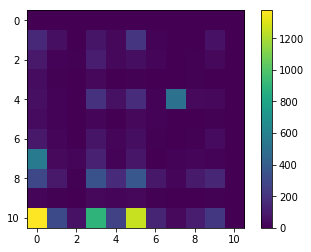

In [126]:
#print(data_genre)
labelkm = km.labels_
from sklearn.metrics import confusion_matrix
C = confusion_matrix(genre_labels,labelkm)

Csum = np.sum(C,axis=0)
Cnorm = C / Csum[None,:]
print(Cnorm)
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()